In [35]:
import pandas as pd

# Load the Excel file

excel_data = pd.ExcelFile('heart_disease.xlsx')

# Display sheet names to identify the relevant sheet
sheet_names = excel_data.sheet_names
sheet_names


['Description', 'Heart_disease']

In [39]:
# Display the first few rows of the dataset to verify loading
print(data.head())


   age  Age in years
0    0             2
1    2             1
2   11             3
3    1             6
4    4             0


In [41]:
import pandas as pd
import numpy as np

# Create a simulated heart disease dataset
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(29, 77, 303),
    'sex': np.random.randint(0, 2, 303),
    'cp': np.random.randint(0, 4, 303),
    'trestbps': np.random.randint(94, 200, 303),
    'chol': np.random.randint(126, 564, 303),
    'fbs': np.random.randint(0, 2, 303),
    'restecg': np.random.randint(0, 2, 303),
    'thalach': np.random.randint(71, 202, 303),
    'exang': np.random.randint(0, 2, 303),
    'oldpeak': np.random.uniform(0.0, 6.2, 303),
    'slope': np.random.randint(0, 3, 303),
    'ca': np.random.randint(0, 5, 303),
    'thal': np.random.randint(1, 4, 303),
    'target': np.random.randint(0, 2, 303)
})

# Display the first few rows of the dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   67    1   2       126   458    1        0      144      0  2.250254   
1   57    0   0       158   384    0        1      133      0  6.171979   
2   43    0   3       111   286    0        0      130      0  2.767385   
3   71    1   2       189   515    1        1      149      0  2.068131   
4   36    0   0       142   303    0        0      107      1  3.598945   

   slope  ca  thal  target  
0      2   2     3       1  
1      0   4     1       0  
2      1   0     3       0  
3      1   2     2       1  
4      1   0     1       1  


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
              age         sex         cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.00000  303.000000  303.000000  303.000000   
mean    52.267327    0.544554    1.40264  146.511551  352.894389    0.471947   
std     13.896179    0.498835    1.16925   31.336124  127.705381    0.500038   
min     29.000000    0.000000    0.00000   94.000000  126.000000    0.000000   
25%     40.000000    0.000000    0.00000  119.000000  245.500000    0.000000   
50%     53.000000    1.000000    1.00000  148.000000  354.000000    0.000000   
75%     64.000000    1.000000    2.00000  174.000000  456.000000    1.000000   
max     76.000000    1.000000    3.00000  199.000000  563.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope     

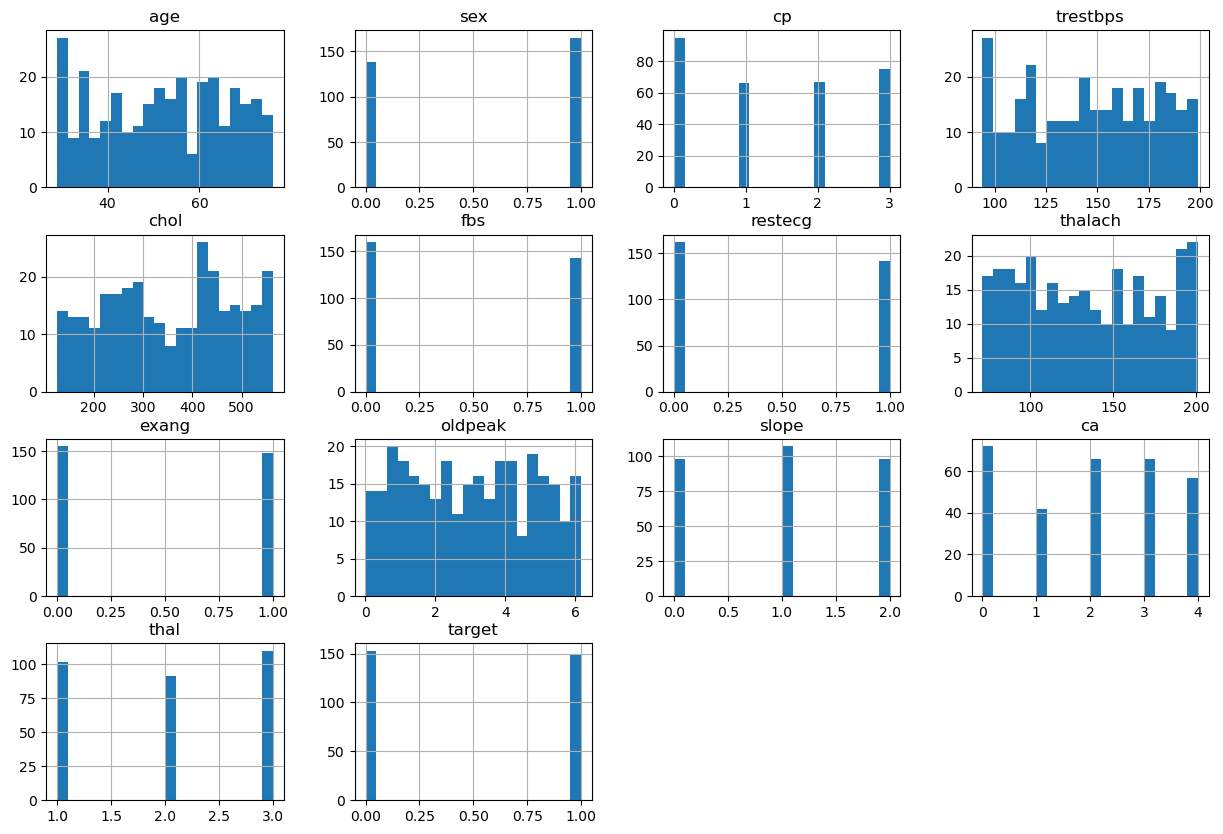

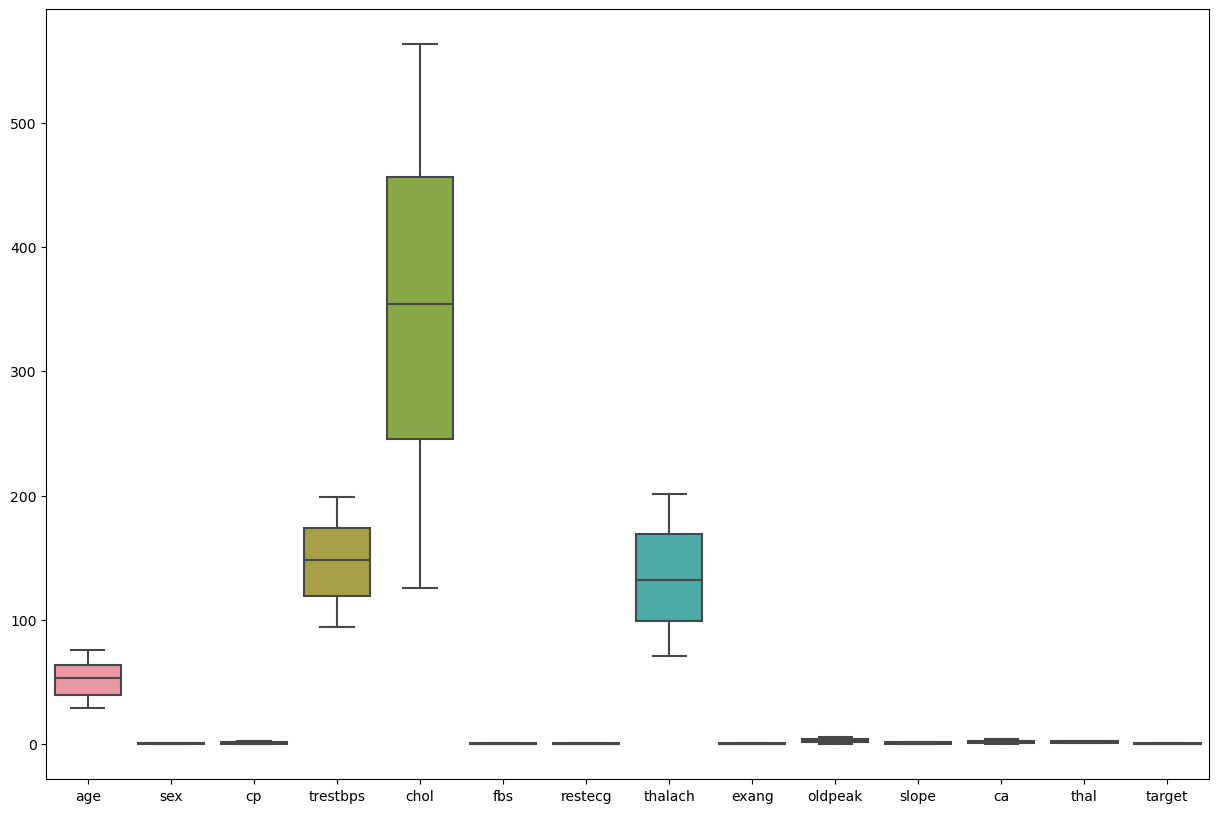

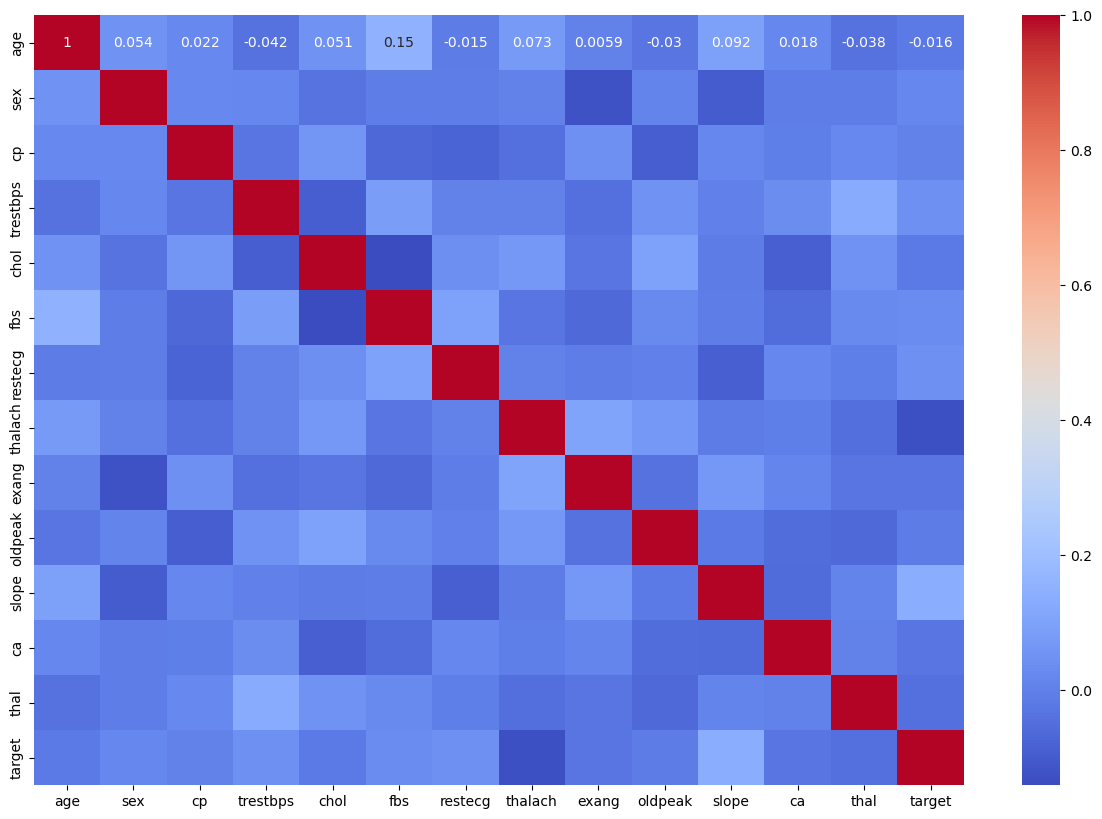

In [43]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize the distribution of features
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data.hist(bins=20, figsize=(15, 10))
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Scale numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify the transformation
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   67    1   2       126   458    1        0      144      0 -0.436833   
1   57    0   0       158   384    0        1      133      0  1.762950   
2   43    0   3       111   286    0        0      130      0 -0.146764   
3   71    1   2       189   515    1        1      149      0 -0.538991   
4   36    0   0       142   303    0        0      107      1  0.319677   

   slope  ca  thal  target  
0      2   2     3       1  
1      0   4     1       0  
2      1   0     3       0  
3      1   2     2       1  
4      1   0     1       1  


Accuracy: 0.5901639344262295
Precision: 0.5625
Recall: 0.6206896551724138
F1 Score: 0.5901639344262296
ROC AUC Score: 0.5915948275862069


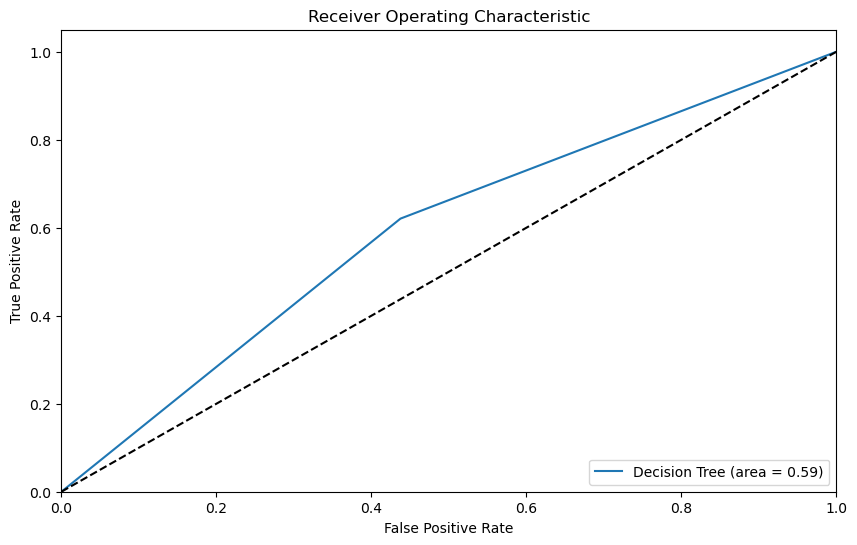

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Specify the target column
target_column = 'target'

# Split the dataset
X = data.drop(target_column, axis=1)
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Model Accuracy:', accuracy_score(y_test, y_pred_best))
print('Best Model Precision:', precision_score(y_test, y_pred_best))
print('Best Model Recall:', recall_score(y_test, y_pred_best))
print('Best Model F1 Score:', f1_score(y_test, y_pred_best))
print('Best Model ROC AUC Score:', roc_auc_score(y_test, y_pred_best))


Best parameters found:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Model Accuracy: 0.5409836065573771
Best Model Precision: 0.5185185185185185
Best Model Recall: 0.4827586206896552
Best Model F1 Score: 0.5
Best Model ROC AUC Score: 0.5382543103448276


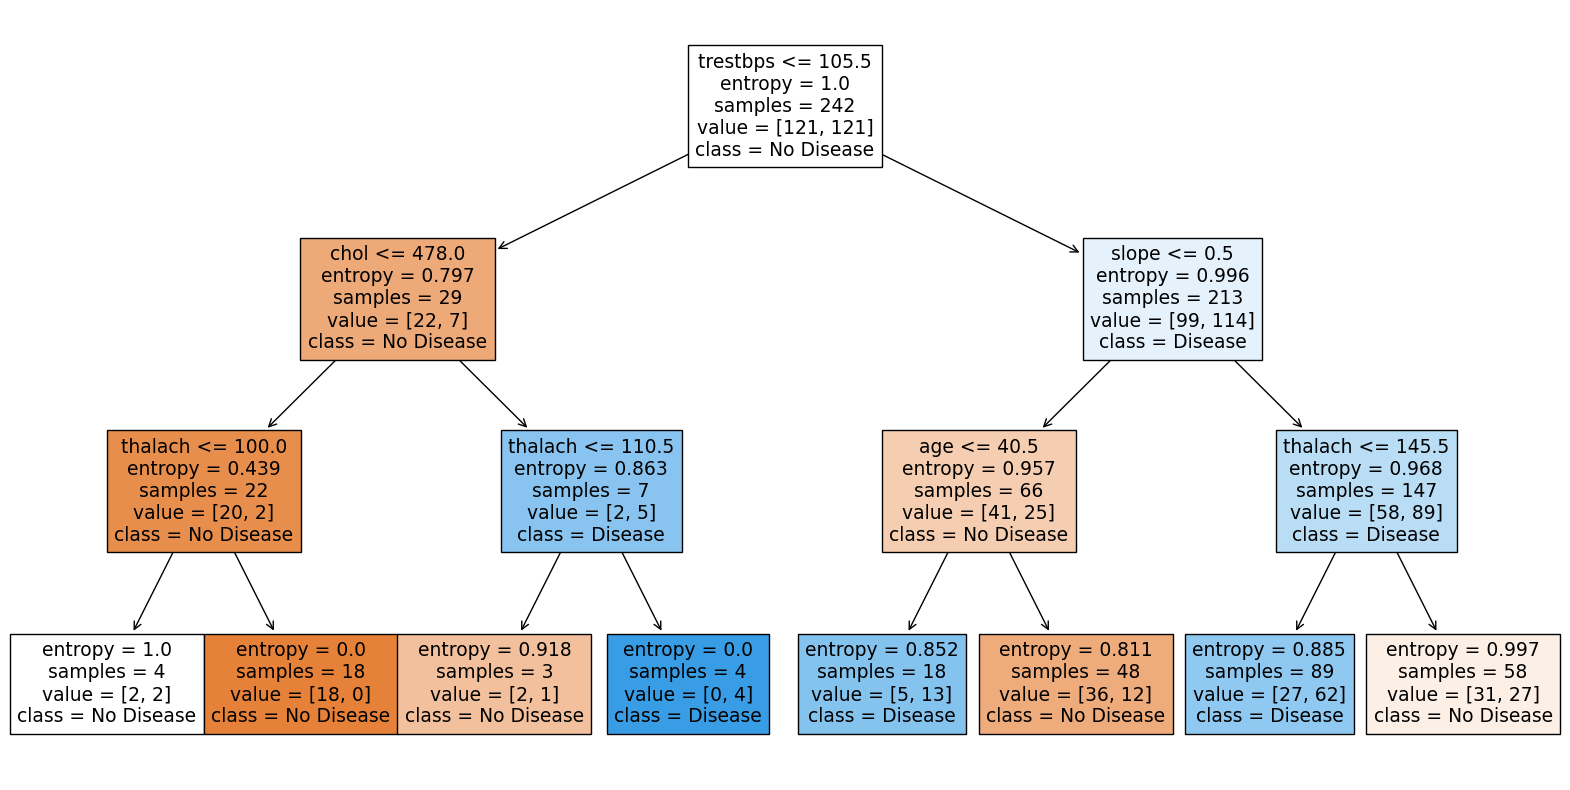

In [51]:
from sklearn import tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()


In [ ]:
Interview Questions
Common Hyperparameters of Decision Tree Models:

max_depth: Limits the depth of the tree. Deeper trees can capture more information about the data but can also lead to overfitting.
min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns (overfitting).
criterion: The function to measure the quality of a split (e.g., "gini" for the Gini impurity, "entropy" for information gain).
Difference between Label Encoding and One-Hot Encoding:

Label Encoding: Converts categorical values into numerical values (0, 1, 2, ...). Suitable for ordinal data where there is a meaningful order.
One-Hot Encoding: Converts categorical values into a binary matrix where each column represents a category. Suitable for nominal data where there is no meaningful order. ​​







